### Stock Market Prediction And Forecasting Using Stacked LSTM

In [1]:
### Data Collection
import pandas_datareader as pdr
key="3204299e61f9d128c579936732329f684cee11ba"

In [2]:
df = pdr.get_data_tiingo('AAPL', api_key=key)

In [3]:
df.to_csv('AAPL.csv')

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv('AAPL.csv')

In [6]:
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2016-07-25 00:00:00+00:00,97.34,98.84,96.92,98.250,40382921,22.730199,23.080469,22.632123,22.942696,161531684,0.0,1.0
1,AAPL,2016-07-26 00:00:00+00:00,96.67,97.97,96.42,96.820,56239822,22.573745,22.877312,22.515367,22.608772,224959288,0.0,1.0
2,AAPL,2016-07-27 00:00:00+00:00,102.95,104.35,102.75,104.265,92344820,24.040209,24.367128,23.993507,24.347280,369379280,0.0,1.0
3,AAPL,2016-07-28 00:00:00+00:00,104.34,104.45,102.82,102.830,39869839,24.364793,24.390480,24.009853,24.012188,159479356,0.0,1.0
4,AAPL,2016-07-29 00:00:00+00:00,104.21,104.55,103.68,104.190,27733688,24.334436,24.413831,24.210674,24.329766,110934752,0.0,1.0


In [7]:
df.tail()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
1252,AAPL,2021-07-15 00:00:00+00:00,148.48,150.0000,147.09,149.24,106820297,148.48,150.0000,147.09,149.24,106820297,0.0,1.0
1253,AAPL,2021-07-16 00:00:00+00:00,146.39,149.7600,145.88,148.46,93251426,146.39,149.7600,145.88,148.46,93251426,0.0,1.0
1254,AAPL,2021-07-19 00:00:00+00:00,142.45,144.0700,141.67,143.75,121434571,142.45,144.0700,141.67,143.75,121434571,0.0,1.0
1255,AAPL,2021-07-20 00:00:00+00:00,146.15,147.0997,142.96,143.46,96350036,146.15,147.0997,142.96,143.46,96350036,0.0,1.0
1256,AAPL,2021-07-21 00:00:00+00:00,145.40,146.1300,144.63,145.53,74993460,145.40,146.1300,144.63,145.53,74993460,0.0,1.0


In [8]:
df1=df.reset_index()['close']

In [9]:
df1

0        97.34
1        96.67
2       102.95
3       104.34
4       104.21
         ...  
1252    148.48
1253    146.39
1254    142.45
1255    146.15
1256    145.40
Name: close, Length: 1257, dtype: float64

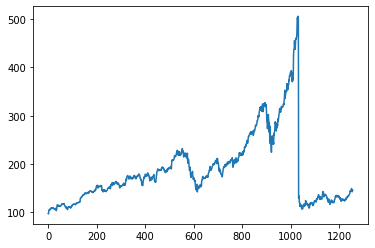

In [10]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [11]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [12]:
import numpy as np

In [13]:
df1

0        97.34
1        96.67
2       102.95
3       104.34
4       104.21
         ...  
1252    148.48
1253    146.39
1254    142.45
1255    146.15
1256    145.40
Name: close, Length: 1257, dtype: float64

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
print(df1)

[[0.00163646]
 [0.        ]
 [0.01533877]
 ...
 [0.11181672]
 [0.12085389]
 [0.11902203]]


In [16]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:
training_size,test_size

(817, 440)

In [18]:
train_data

array([[0.00163646],
       [0.        ],
       [0.01533877],
       [0.01873382],
       [0.0184163 ],
       [0.02291046],
       [0.01907577],
       [0.02227541],
       [0.02247081],
       [0.0264032 ],
       [0.02857701],
       [0.0296517 ],
       [0.02767329],
       [0.02750232],
       [0.02811294],
       [0.03128816],
       [0.03104392],
       [0.03065312],
       [0.03031117],
       [0.03099507],
       [0.02891896],
       [0.0297494 ],
       [0.02774657],
       [0.02662303],
       [0.02508427],
       [0.02479117],
       [0.02278833],
       [0.02303258],
       [0.02457134],
       [0.02701382],
       [0.02694055],
       [0.02855259],
       [0.02161594],
       [0.01577842],
       [0.02142055],
       [0.02755117],
       [0.03688144],
       [0.04616286],
       [0.04457525],
       [0.04130233],
       [0.04127791],
       [0.04122906],
       [0.04384251],
       [0.03917737],
       [0.03959259],
       [0.04010552],
       [0.04220605],
       [0.037

In [19]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [20]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [21]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [22]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [23]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [24]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [25]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 8s 276ms/step - loss: 0.0068 - val_loss: 0.0395
Epoch 2/100
12/12 [==============================] - 2s 174ms/step - loss: 0.0018 - val_loss: 0.0279
Epoch 3/100
12/12 [==============================] - 2s 171ms/step - loss: 9.8323e-04 - val_loss: 0.0232
Epoch 4/100
12/12 [==============================] - 2s 175ms/step - loss: 6.7633e-04 - val_loss: 0.0215
Epoch 5/100
12/12 [==============================] - 2s 178ms/step - loss: 5.2944e-04 - val_loss: 0.0211
Epoch 6/100
12/12 [==============================] - 2s 177ms/step - loss: 4.8364e-04 - val_loss: 0.0210
Epoch 7/100
12/12 [==============================] - 2s 172ms/step - loss: 4.6743e-04 - val_loss: 0.0204
Epoch 8/100
12/12 [==============================] - 2s 174ms/step - loss: 4.5218e-04 - val_loss: 0.0200
Epoch 9/100
12/12 [==============================] - 2s 172ms/step - loss: 4.6802e-04 - val_loss: 0.0201
Epoch 10/100
12/12 [==============================] - 2s 173ms/

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

In [ ]:
plt.plot(df3)